In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [5]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [7]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
true.isnull()

,title,text,subject,date
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
23476,False,False,False,False
23477,False,False,False,False
23478,False,False,False,False
23479,False,False,False,False


In [14]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [16]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [17]:
fake["label"] = 0
true["label"] = 1

In [18]:
data = pd.concat([fake, true], axis=0)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [20]:
def avg_word_length(text):
    words = str(text).split()
    if len(words) == 0:
        return 0
    return np.mean([len(word) for word in words])

data["avg_word_length"] = data["text"].apply(avg_word_length)


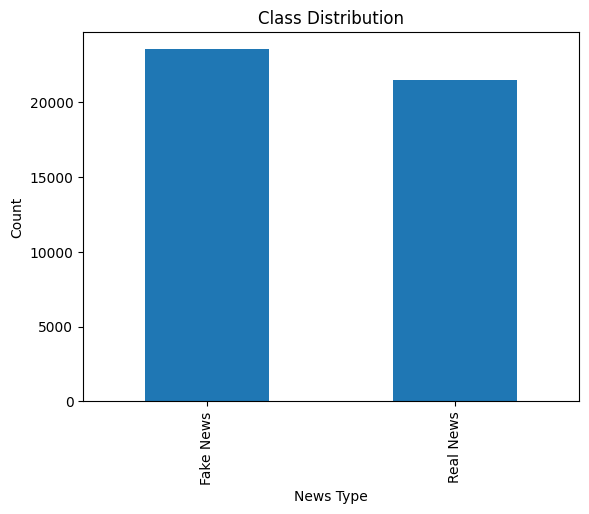

In [21]:
plt.figure()
data["label"].value_counts().plot(kind="bar")
plt.xticks([0, 1], ["Fake News", "Real News"])
plt.title("Class Distribution")
plt.xlabel("News Type")
plt.ylabel("Count")
plt.show()

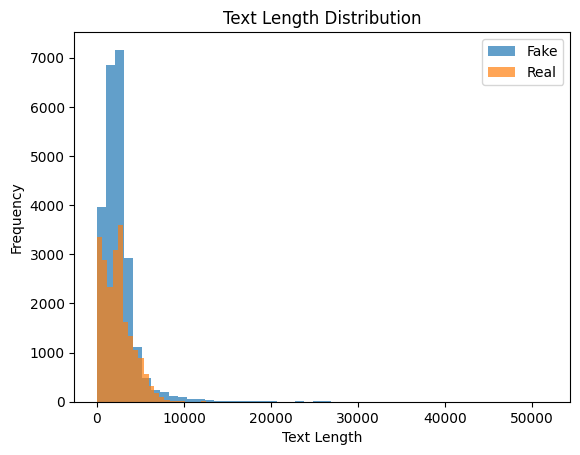

In [22]:
plt.figure()
plt.hist(data[data["label"] == 0]["text_length"], bins=50, alpha=0.7, label="Fake")
plt.hist(data[data["label"] == 1]["text_length"], bins=50, alpha=0.7, label="Real")
plt.title("Text Length Distribution")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.legend()
plt.show()

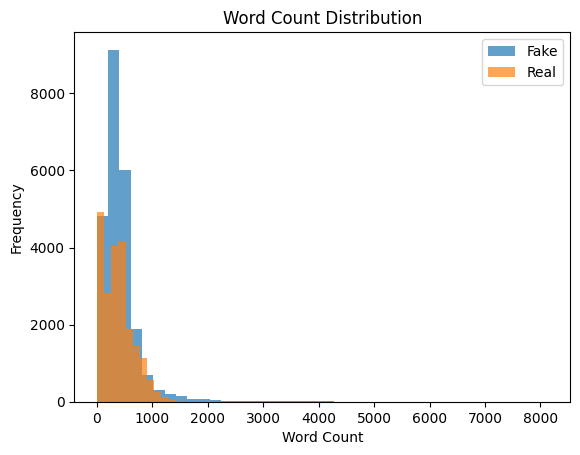

In [27]:
plt.figure()
plt.hist(data[data["label"] == 0]["word_count"], bins=40, alpha=0.7, label="Fake")
plt.hist(data[data["label"] == 1]["word_count"], bins=40, alpha=0.7, label="Real")
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()

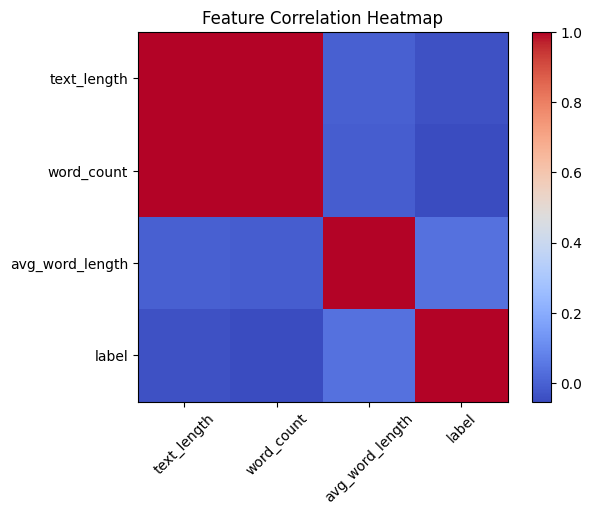

In [29]:
corr = data[["text_length", "word_count", "avg_word_length", "label"]].corr()
plt.figure()
plt.imshow(corr, cmap="coolwarm")
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Feature Correlation Heatmap")
plt.show()

In [30]:
X = data[["text_length", "word_count", "avg_word_length"]]
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [31]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = model.predict(X_test)

In [33]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6253006681514477


In [34]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.63      0.64      5863
           1       0.61      0.62      0.61      5362

    accuracy                           0.63     11225
   macro avg       0.62      0.63      0.62     11225
weighted avg       0.63      0.63      0.63     11225

